# VISUALIZANDO OS DADOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
clean_train_path = 'data/credit-score/clean_train.csv'
clean_test_path  = 'data/credit-score/clean_test.csv'

df = pd.read_csv(clean_train_path)

# df.info()

In [3]:
df = df.drop(columns=['Type_of_Loan', 'Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  object 
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  int64  
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    100000 non-null  int64  
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  int64  
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  fl

Em algumas análises, consideramos apenas os valores `Good` e `Poor` para *credit score*. Como ficará claro mais a seguir, o valor `Standard`, por possuir mais exemplos e pelo seu comportamento ser mais geral, acaba tomando conta de muitos plots.

In [55]:
clist = ['C0', 'C1', 'C2']

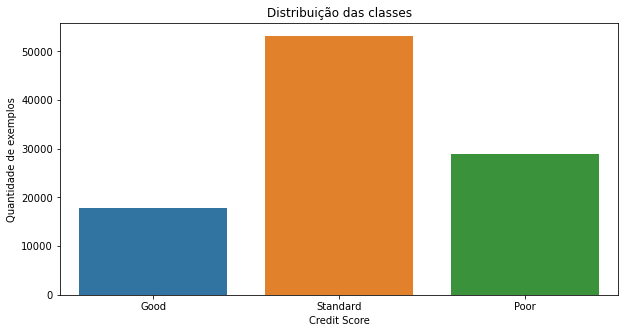

In [141]:
ax = sns.countplot(x='Credit_Score', data=df, palette=clist)
_ = ax.set_title("Distribuição das classes")
_ = ax.set_xlabel("Credit Score")
_ = ax.set_ylabel("Quantidade de exemplos")

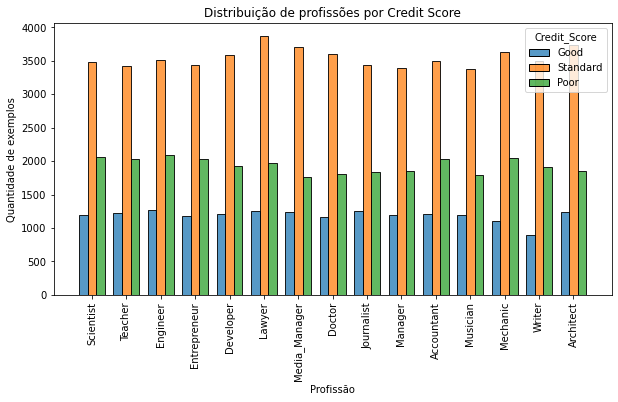

In [152]:
ax = sns.histplot(x='Occupation', data=df, hue='Credit_Score', multiple='dodge', shrink=0.75, stat='count', palette=clist)
_ = ax.set_title("Distribuição de profissões por Credit Score")
_ = ax.set_ylabel('Quantidade de exemplos')
_ = ax.set_xlabel('Profissão')
_ = plt.xticks(rotation=90)

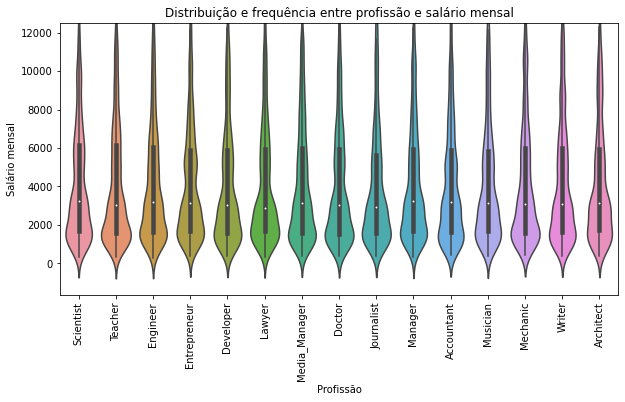

In [161]:
ax = sns.violinplot(x='Occupation', y='Monthly_Inhand_Salary', data=df)
_ = ax.set_title("Distribuição e frequência entre profissão e salário mensal")
_ = ax.set_xlabel("Profissão")
_ = ax.set_ylabel("Salário mensal")

_ = plt.ylim(None, 12500)
_ = plt.xticks(rotation=90)

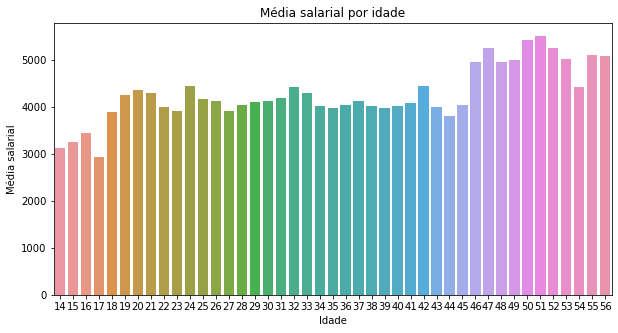

In [225]:
plot_values = df.groupby('Age')['Monthly_Inhand_Salary'].mean()
ax = sns.barplot(x=plot_values.index, y=plot_values.values)
_ = ax.set_title("Média salarial por idade")
_ = ax.set_xlabel("Idade")
_ = ax.set_ylabel("Média salarial")

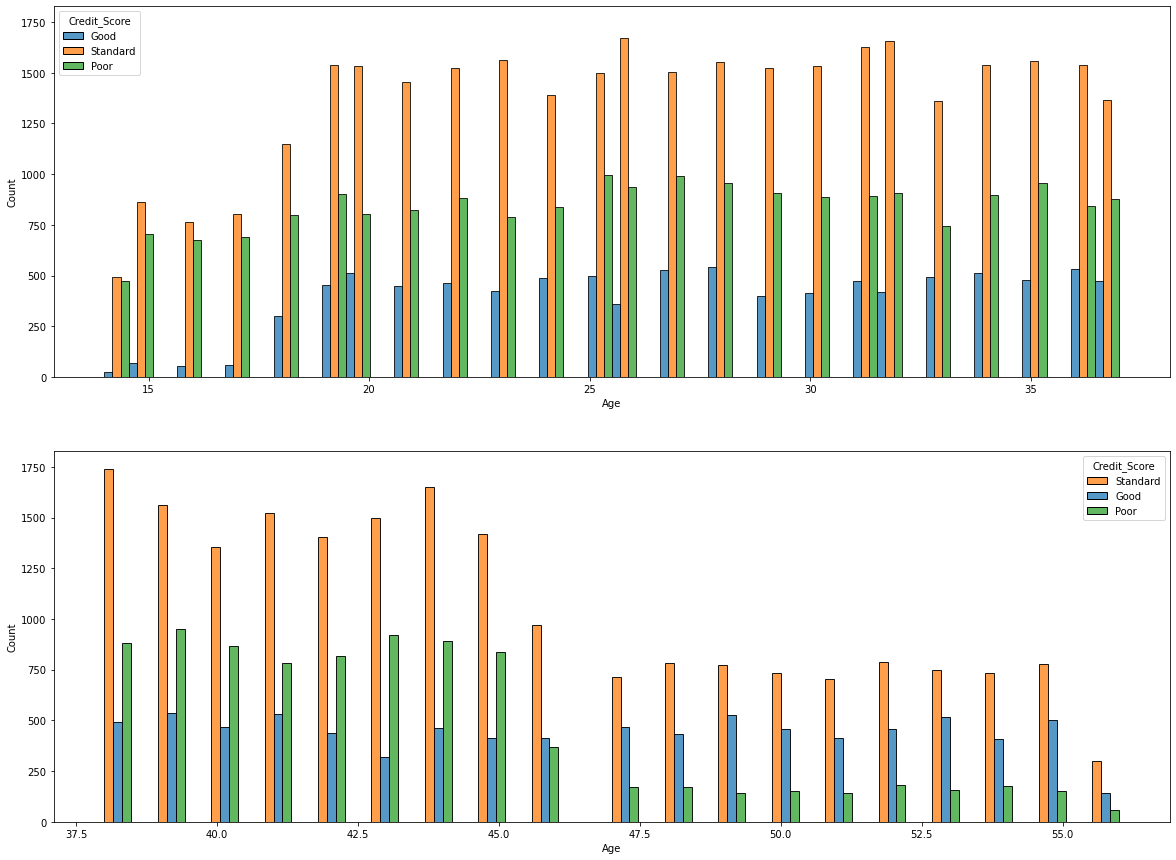

In [273]:
_, axs = plt.subplots(2, figsize=(20, 15), sharex=False, sharey=True)
_ = sns.histplot(x='Age', stat='count', multiple='dodge', 
                 data=df[ df['Age'] <= 37 ], 
                 hue='Credit_Score', ax=axs[0],
                 palette=['C0', 'C1', 'C2'])
_ = sns.histplot(x='Age', stat='count', multiple='dodge', 
                 data=df[ df['Age'] > 37 ], 
                 hue='Credit_Score', ax=axs[1],
                 palette=['C1', 'C0', 'C2'])

A quantidade bruta de exemplos com *credit score* `Good` a partir de 46 anos não muda, mas a sua proporção com relação a quantidade de exemplos dos outros dois tipos (`Standard` e `Poor`) aumenta.

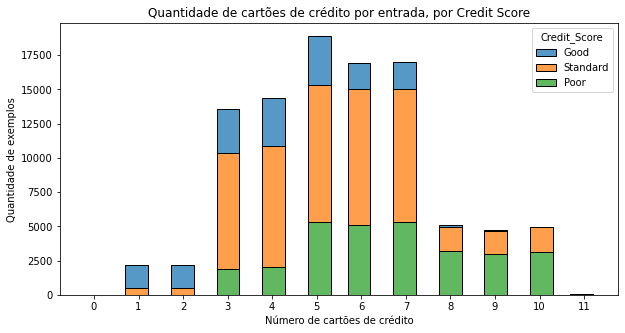

In [60]:
ax = sns.histplot(x='Num_Credit_Card', data=df, hue='Credit_Score', multiple='stack', shrink=4, palette=clist)
_ = ax.set_title("Quantidade de cartões de crédito por entrada, por Credit Score")
_ = ax.set_xlabel("Número de cartões de crédito")
_ = ax.set_ylabel("Quantidade de exemplos")
_ = ax.set_xticks(range(0, 12))

Nota-se claramente, quanto maior for a quantidade de cartões, maior a chance da análise de crédito da pessoa ser negativa. Afinal, mesmo que tenhamos poucos exemplos com apenas 1 ou 2 cartões, a maioria deles são positivos.

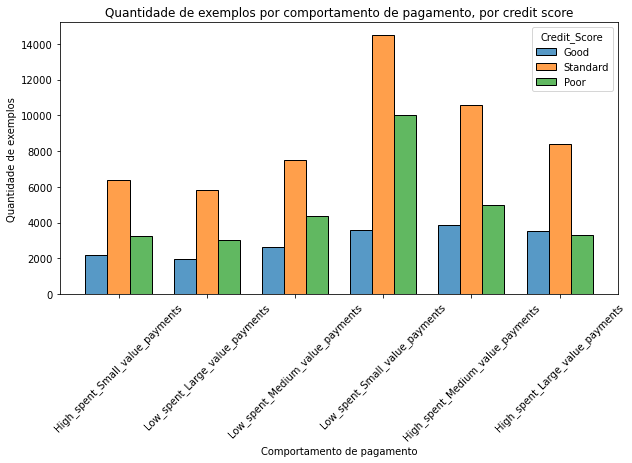

In [143]:
ax = sns.histplot(x='Payment_Behaviour', data=df, hue='Credit_Score', multiple='dodge', stat='count', shrink=0.75)
_ = ax.set_title("Quantidade de exemplos por comportamento de pagamento, por credit score")
_ = ax.set_xlabel("Comportamento de pagamento")
_ = ax.set_ylabel("Quantidade de exemplos")

_ = plt.xticks(rotation=45)

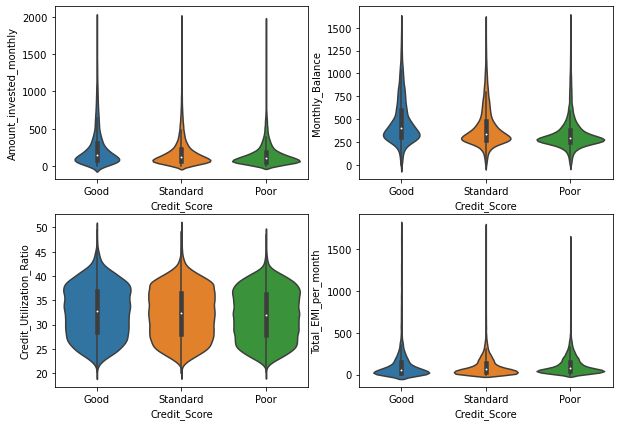

In [251]:
xaxis = df['Monthly_Balance'].apply(lambda x: 0. if x < 0. else x)  # Pro violinplot funcionar

fig, axs = plt.subplots(2, 2, figsize=(10, 7), sharex=False)
_ = sns.violinplot(x='Credit_Score', y='Amount_invested_monthly', data=df, ax=axs[0][0])
_ = sns.violinplot(x='Credit_Score', y=xaxis, data=df, ax=axs[0][1])
_ = sns.violinplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=df, ax=axs[1][0])
_ = sns.violinplot(x='Credit_Score', y='Total_EMI_per_month', data=df, ax=axs[1][1])

Os *violin plots* acima mostram que, para esses quatro atributos, o comportamento da distribuição deles pelo *credit score* de seus exemplos é bem parecido. Portanto, esses atributos influenciarão pouco para a classificação final. Por outro lado, podemos ver na célula abaixo atributos que influenciam para a classificação final ao analisar a diferença na distribuição dos *violin plots* por *credit score*.

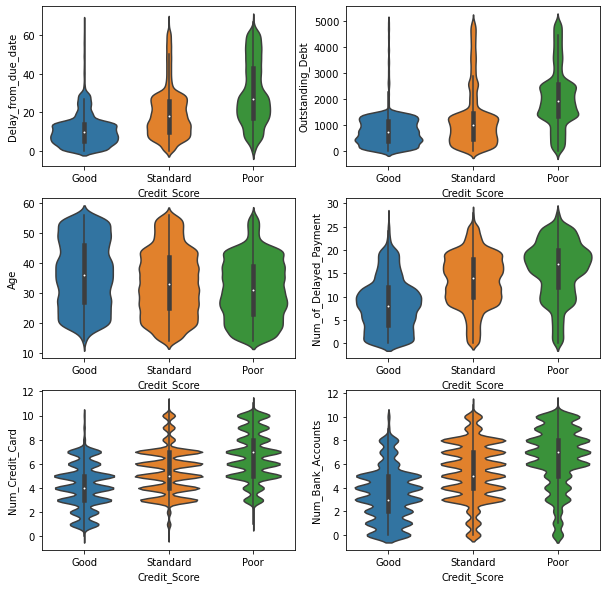

In [263]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10), sharex=False)

_ = sns.violinplot(x='Credit_Score', y='Delay_from_due_date', data=df, ax=axs[0][0])
_ = sns.violinplot(x='Credit_Score', y='Outstanding_Debt', data=df, ax=axs[0][1])
_ = sns.violinplot(x='Credit_Score', y='Age', data=df, ax=axs[1][0])
_ = sns.violinplot(x='Credit_Score', y='Num_of_Delayed_Payment', data=df, ax=axs[1][1])
_ = sns.violinplot(x='Credit_Score', y='Num_Credit_Card', data=df, ax=axs[2][0])
_ = sns.violinplot(x='Credit_Score', y='Num_Bank_Accounts', data=df, ax=axs[2][1])

Até mesmo o número de cartões de crédito que um *customer* possui, atributo inteiro e com *range* pequeno, influencia um tanto na classificação final: *credit scores* bons tendem a condensar menores números de cartões de crédito, ao passo que *credit scores* ruins condensam números maiores.

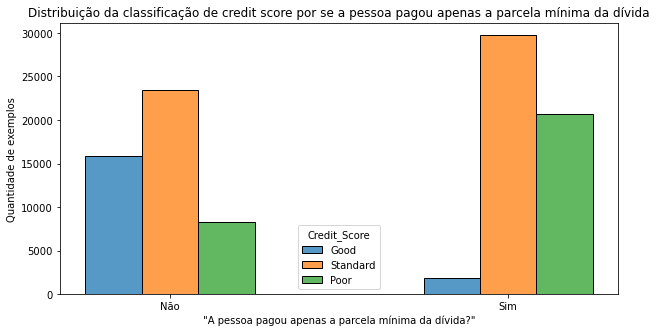

In [146]:
xaxis = df['Payment_of_Min_Amount'].apply(lambda x: 'Sim' if x == 1 else 'Não')

ax = sns.histplot(x=xaxis, data=df, shrink=0.5, hue='Credit_Score', multiple='dodge')
_ = ax.set_title("Distribuição da classificação de credit score por se a pessoa pagou apenas a parcela mínima da dívida")
_ = ax.set_xlabel('"A pessoa pagou apenas a parcela mínima da dívida?"')
_ = ax.set_ylabel("Quantidade de exemplos")

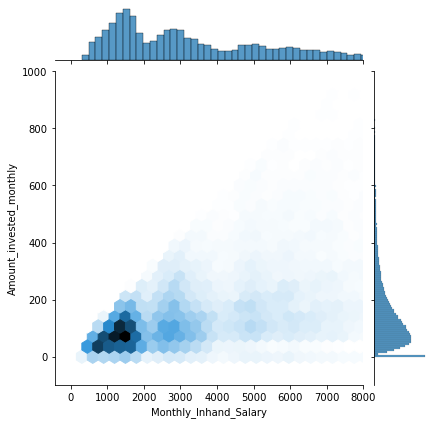

In [234]:
jg = sns.jointplot(kind='hex', x='Monthly_Inhand_Salary', y='Amount_invested_monthly', data=df)
_ = plt.ylim(None, 1000)
_ = plt.xlim(None, 8000)

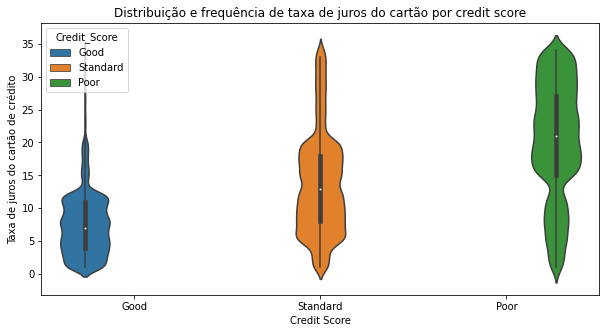

In [259]:
ax = sns.violinplot(x='Credit_Score', y='Interest_Rate', data=df, hue='Credit_Score')
_ = ax.set_title("Distribuição e frequência de taxa de juros do cartão por credit score")
_ = ax.set_xlabel("Credit Score")
_ = ax.set_ylabel("Taxa de juros do cartão de crédito")

In [188]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_24004/2001914525.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Age,1.00,0.09,-0.19,-0.15,-0.22,-0.21,-0.17,-0.18,-0.16,-0.25,-0.20,0.03,-0.23,-0.05,0.05,-0.00
Monthly_Inhand_Salary,0.09,1.00,-0.28,-0.22,-0.30,-0.25,-0.25,-0.29,-0.18,-0.28,-0.27,0.18,-0.27,0.43,0.60,-0.00
Num_Bank_Accounts,-0.19,-0.28,1.00,0.44,0.58,0.47,0.56,0.60,0.33,0.52,0.51,-0.07,0.51,0.05,-0.17,0.01
Num_Credit_Card,-0.15,-0.22,0.44,1.00,0.50,0.42,0.48,0.42,0.25,0.46,0.49,-0.06,0.36,0.06,-0.14,-0.00
Interest_Rate,-0.22,-0.30,0.58,0.50,1.00,0.56,0.59,0.57,0.37,0.63,0.63,-0.08,0.55,0.07,-0.19,0.00
Num_of_Loan,-0.21,-0.25,0.47,0.42,0.56,1.00,0.50,0.47,0.37,0.57,0.64,-0.10,0.45,0.34,-0.16,-0.00
Delay_from_due_date,-0.17,-0.25,0.56,0.48,0.59,0.50,1.00,0.54,0.29,0.54,0.57,-0.06,0.44,0.08,-0.16,0.01
Num_of_Delayed_Payment,-0.18,-0.29,0.60,0.42,0.57,0.47,0.54,1.00,0.33,0.50,0.50,-0.07,0.51,0.05,-0.17,0.01
Changed_Credit_Limit,-0.16,-0.18,0.33,0.25,0.37,0.37,0.29,0.33,1.00,0.38,0.46,-0.05,0.44,0.07,-0.11,-0.00
Num_Credit_Inquiries,-0.25,-0.28,0.52,0.46,0.63,0.57,0.54,0.50,0.38,1.00,0.60,-0.08,0.55,0.10,-0.17,-0.00


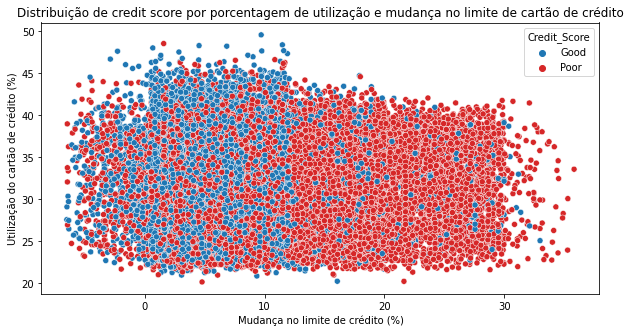

In [248]:
ax = sns.scatterplot(x='Changed_Credit_Limit', y='Credit_Utilization_Ratio', 
                    data=df[ (df['Credit_Score'] == 'Good') | (df['Credit_Score'] == 'Poor') ],
                    hue='Credit_Score',
                    palette=['C0', 'C3'])
_ = ax.set_title("Distribuição de credit score por porcentagem de utilização e mudança no limite de cartão de crédito")
_ = ax.set_xlabel("Mudança no limite de crédito (%)")
_ = ax.set_ylabel("Utilização do cartão de crédito (%)")

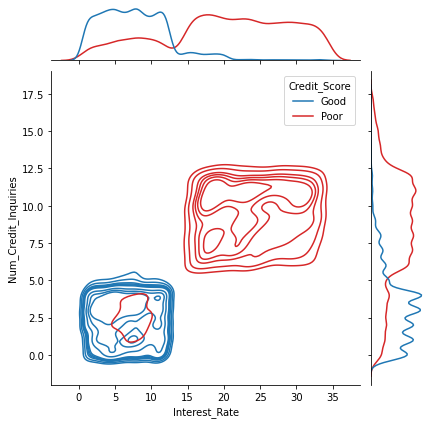

In [283]:
_ = sns.jointplot(kind='kde', y='Num_Credit_Inquiries', x='Interest_Rate', 
                  data=df[ (df['Credit_Score'] == 'Good') | (df['Credit_Score'] == 'Poor') ], 
                  hue='Credit_Score',
                  palette=['C0', 'C3'],
                  thresh=0.35)

Disso, tira-se que as análises boas para *credit score* possuem tanto taxa de juros do cartão quanto número de solicitações de cartão de crédito baixas, ao passo que o comportamento contra-positivo resulta, em geral, em classificações ruins para a análise de *credit score*.

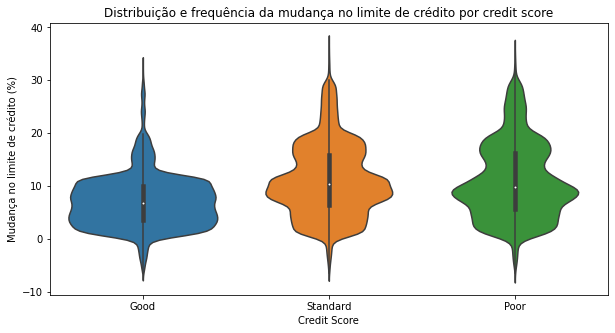

In [264]:
ax = sns.violinplot(x='Credit_Score', y='Changed_Credit_Limit', data=df)
_ = ax.set_title("Distribuição e frequência da mudança no limite de crédito por credit score")
_ = ax.set_xlabel("Credit Score")
_ = ax.set_ylabel("Mudança no limite de crédito (%)")

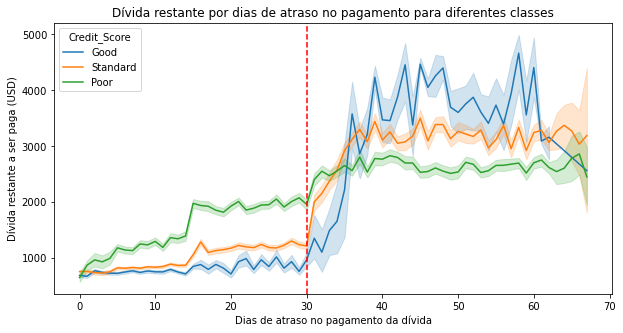

In [247]:
ax = sns.lineplot(x='Delay_from_due_date', y='Outstanding_Debt', data=df, hue='Credit_Score')
_ = ax.set_title("Dívida restante por dias de atraso no pagamento para diferentes classes")
_ = ax.set_xlabel("Dias de atraso no pagamento da dívida")
_ = ax.set_ylabel("Dívida restante a ser paga (USD)")
_ = plt.axvline(30, 0, 1, color='red', linestyle='--')

A partir de um mês de atraso na dívida (linha pontilhada vermelha), vemos que o comportamento das diferentes classificações muda bastante. Clientes com *credit score* `Poor` já apresentam uma quantidade elevada de dívida restante a ser paga desde o dia 0, mas a partir do primeiro mês decorrido esse padrão se inverte - apresentam, agora, a menor quantia restante a ser paga, ao passo que *customers* com um bom *credit score* passam a ser quem mais devem.

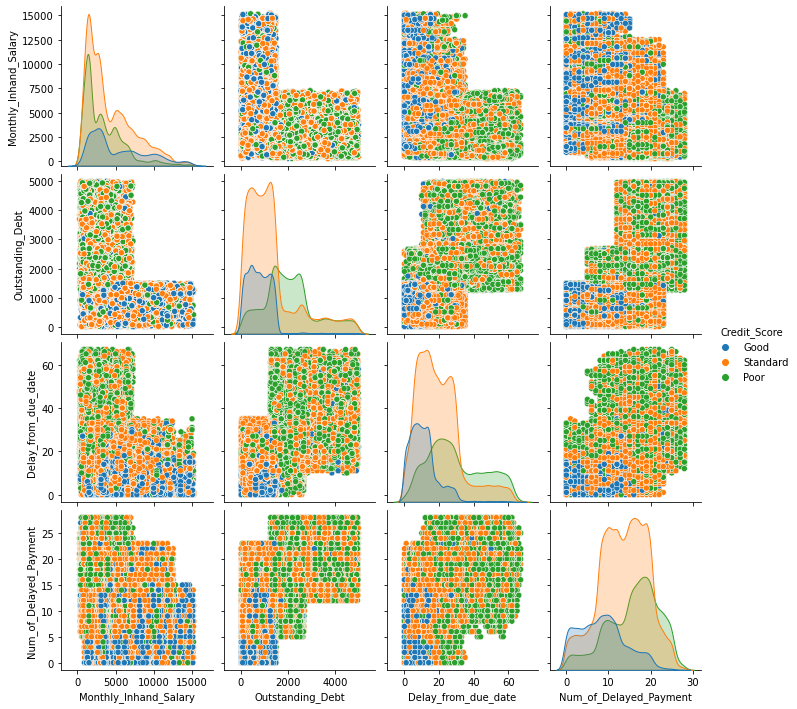

In [268]:
pp_df = df[['Monthly_Inhand_Salary',
            'Outstanding_Debt',
            'Delay_from_due_date',
            'Num_of_Delayed_Payment',
            'Credit_Score']]

_ = sns.pairplot(pp_df, kind='scatter', hue='Credit_Score')

Esse *plot* ficou um pouco poluído por causa dos exemplos cujo *credit score* é `Standard`. É possível entender o comportamento geral dos atributos, mas vejamos o mesmo *plot* e, dessa vez, apenas com exemplos `Good` (azul) e `Poor` (vermelho):

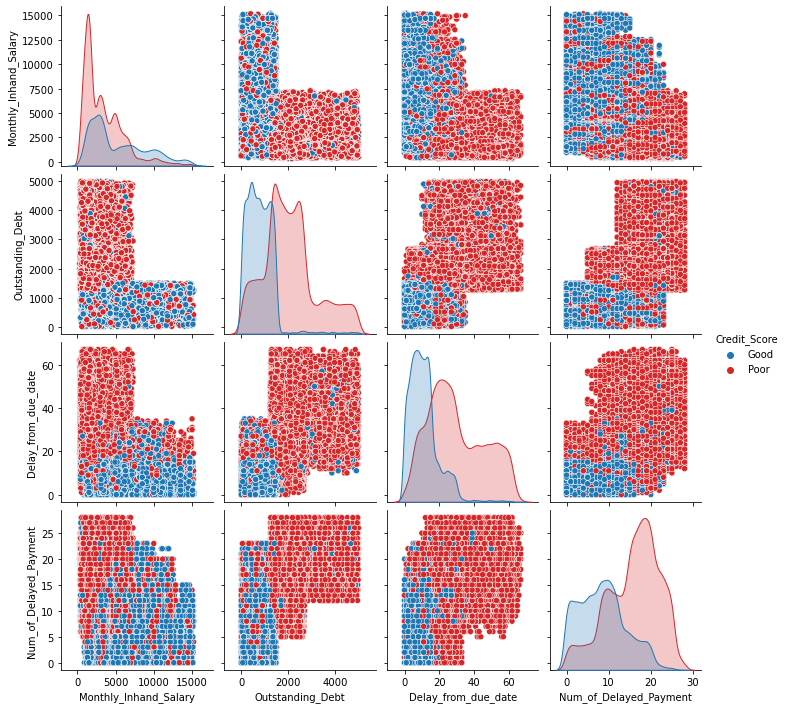

In [269]:
pp_df = df[['Monthly_Inhand_Salary',
            'Outstanding_Debt',
            'Delay_from_due_date',
            'Num_of_Delayed_Payment',
            'Credit_Score']]

_ = sns.pairplot(pp_df[ (pp_df['Credit_Score'] == 'Good') | (pp_df['Credit_Score'] == 'Poor') ],
                 kind='scatter', hue='Credit_Score',
                 palette=['C0', 'C3'])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  object 
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  int64  
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    100000 non-null  int64  
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  int64  
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  fl

In [174]:
print(np.sort(df['Interest_Rate'].unique()))

print(np.sort(df['Num_of_Delayed_Payment'].unique()))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
